In [50]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
import time

In [4]:
def getMatches(img1, img2):
    # Initiate SIFT detector
    sift = cv.SIFT_create()
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    flann = cv.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1,des2,k=2)
    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
    threshold = 0.7
    while len(good)<=10 and threshold<0.9:
        threshold=threshold+0.1
        good = []
        for m,n in matches:
            if m.distance < threshold*n.distance:
                good.append(m)
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
#     matchesMask = mask.ravel().tolist()
#     h,w,c = img1.shape
#     pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
#     dst = cv.perspectiveTransform(pts,M)
#     img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
#     draw_params = dict(matchColor = (0,255,0), # draw matches in green color
#                    singlePointColor = None,
#                    matchesMask = matchesMask, # draw only inliers
#                    flags = 2)
#     img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
#     plt.imshow(img3, 'gray'),plt.show()
    return M

In [51]:
def getTransforms(video):
    start = time.time()
    cap = cv.VideoCapture(video)
    i=0
    prevFrame = 0
    transforms = []
    frames=[]
    while(cap.isOpened()):
        ret,frame = cap.read()
        if ret == False:
            break
        if i!=0:
            matches = getMatches(prevFrame, frame) 
            transforms.append(matches)
        frames.append(frame)
        i+=1
        prevFrame = frame
    cap.release()
    end = time.time()
    print(end-start)
    return transforms,frames


In [52]:
t,frames = getTransforms('C:/Users/dhane/Desktop/videos/desk.mp4')

325.08039450645447


In [36]:
rows,cols,ch = frames[0].shape
M = np.float32(t[0])
dest = cv.warpPerspective(frames[0], M, (cols,rows))

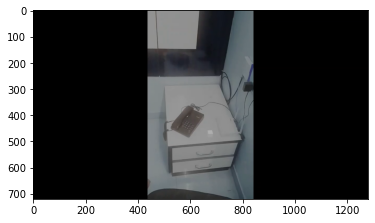

In [42]:
plt.imshow(frames[4])

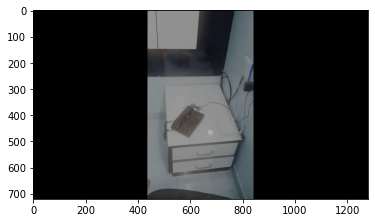

In [38]:
plt.imshow(dest)

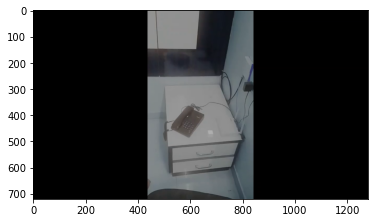

In [39]:
plt.imshow(frames[1])

In [29]:
frames[0].shape

(720, 1280, 3)

In [1]:
img1 = cv.imread('images/frame-01.jpeg',0)          # queryImage
img2 = cv.imread('images/frame-02.jpeg',0) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
threshold = 0.7
while len(good)<=10 and threshold<0.9:
    threshold=threshold+0.1
    good = []
    for m,n in matches:
        if m.distance < threshold*n.distance:
            good.append(m)
    print(threshold)


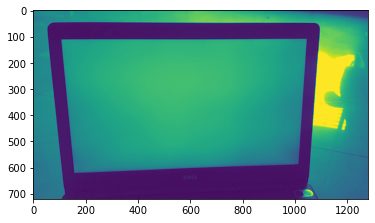

In [2]:
plt.imshow(img1)

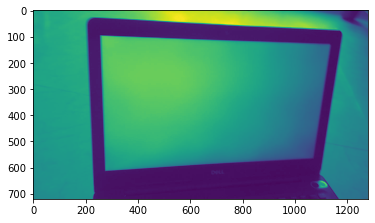

In [3]:
plt.imshow(img2)

In [4]:
len(good)

14

In [5]:
good[0].distance

120.46160888671875

In [6]:
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
matchesMask = mask.ravel().tolist()
h,w = img1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv.perspectiveTransform(pts,M)
img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)

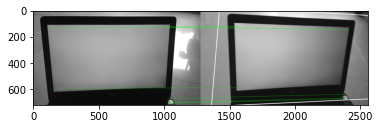

(<matplotlib.image.AxesImage at 0x247227de670>, None)

In [7]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

In [8]:
M

array([[ 1.12657654e+00, -9.04918907e-02,  1.46617345e+02],
       [ 6.07047895e-02,  1.03280396e+00, -2.52359214e+01],
       [ 1.54727257e-04, -2.43681473e-05,  1.00000000e+00]])

In [9]:
mask

array([[0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0]], dtype=uint8)

In [10]:
rows,cols = img1.shape
t = np.float32(M)
dest = cv.warpPerspective(img1, t, (cols,rows))

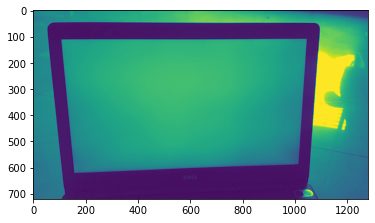

In [13]:
plt.imshow(img1)

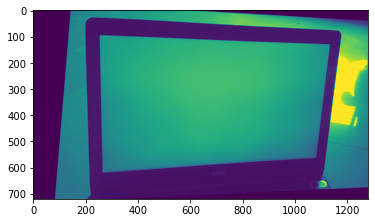

In [11]:
plt.imshow(dest)

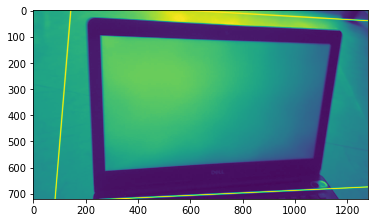

In [12]:
plt.imshow(img2)